In [1]:
# codes/examples in this notebook are from the following post:
# https://www.glennklockwood.com/data-intensive/analysis/perceptron.html

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot
import matplotlib.pylab as plt

In [2]:
data = [[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]

inputs = pd.DataFrame(data, columns=["input 1", "input 2"])
inputs.index.name = "observation #"

ground_truth = pd.Series([0, 1, 1, 1], name="true output", index=inputs.index)

print(pd.concat((inputs, ground_truth), axis=1))

               input 1  input 2  true output
observation #                               
0                    0        0            0
1                    0        1            1
2                    1        0            1
3                    1        1            1


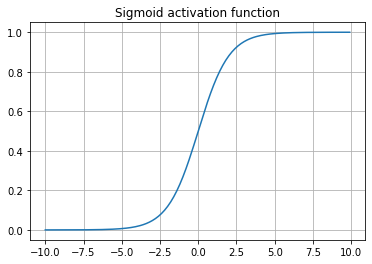

In [3]:
def linear(x, weights, bias):
    """
    Linear model function
    y(x) = x.w + b
    """
    return np.dot(x, weights) + bias

def sigmoid(x):
    """
    Activation function
    """
    return 1.0 / (1.0 + np.exp(-x))

matplotlib.pyplot.plot(np.arange(-10, 10, 0.1), sigmoid(np.arange(-10, 10, 0.1)), label="sigmoid")
matplotlib.pyplot.grid()
matplotlib.pyplot.title("Sigmoid activation function")
pass

In [4]:
# initialization
np.random.seed(seed=1)
weights = np.random.rand(inputs.shape[1], 1)
print(pd.DataFrame(weights, index=inputs.columns, columns=["weight"]))

bias = np.random.rand(1)[0]
print("\nSetting starting bias to a random value: {:4f}".format(bias))

learning_rate = 0.05
print("\nSetting learning rate to {} based on prior experience.".format(learning_rate))

NUM_ITERATIONS = 10000

           weight
input 1  0.417022
input 2  0.720324

Setting starting bias to a random value: 0.000114

Setting learning rate to 0.05 based on prior experience.


error at step     0:   1.47e+00
error at step  1000:   2.33e-01
error at step  2000:   1.09e-01
error at step  3000:   6.98e-02
error at step  4000:   5.10e-02
error at step  5000:   4.00e-02
error at step  6000:   3.29e-02
error at step  7000:   2.79e-02
error at step  8000:   2.43e-02
error at step  9000:   2.14e-02

Final weights: [9.98578506 9.98589032]
Final bias:    -4.52752860008788


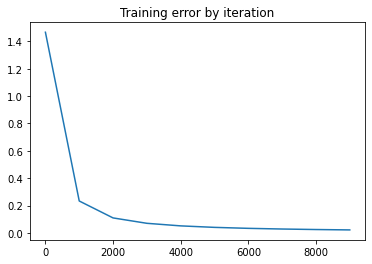

In [5]:
# convert dataframe bits into arrays for processing
inputs_array = inputs.to_numpy()
truth_array = ground_truth.to_numpy().reshape(-1, 1)

errors = dict()

x = inputs_array

for i in range(NUM_ITERATIONS):
    y = linear(x, weights, bias)
    f = sigmoid(y)

    error = np.abs(f - truth_array)

    # calculate out partial derivatives for each input
    dE_df = error/(f - truth_array)
    df_dy = sigmoid(y) * (1.0 - sigmoid(y))
    dy_dw = x
    dE_dy = dE_df * df_dy
    dE_dw = np.dot(dy_dw.T, dE_dy)  # dy_dw = x

    # update weights and biases - the error is the sum of error over each input
    weights -= learning_rate * dE_dw
    bias -= learning_rate * dE_dy.sum()

    if i % (NUM_ITERATIONS / 10) == 0:
        print("error at step {:5d}: {:10.2e}".format(i, error.sum()))
        errors[i] = error.sum()

print("\nFinal weights: {}".format(weights.flatten()))
print("Final bias:    {}".format(bias))

lists = sorted(errors.items())
x_axis, y_axis = zip(*lists)
plt.plot(x_axis, y_axis)
plt.title("Training error by iteration")
plt.show()

In [6]:
predicted_output = sigmoid(np.dot(x, weights) + bias)
predicted_output = pd.DataFrame(
    predicted_output,
    columns=["predicted output"],
    index=inputs.index)

print(pd.concat((
    inputs,
    ground_truth,
    predicted_output),
    axis=1))

               input 1  input 2  true output  predicted output
observation #                                                 
0                    0        0            0          0.010692
1                    0        1            1          0.995758
2                    1        0            1          0.995757
3                    1        1            1          1.000000
